The goal of the task i'm working on is  to generate new molecules using a Recurrent Neural Network. **De novo simply means to synthesize new**. The idea is the train the model to learn patterns in SMILES strings so that the output generated can match valid molecules. SMILES is simply a String representation of a molecule based off the structure and different components of a molecule, and is good for representing molecules in a way that computers understand.





## import general packages to per-process data SMILES


first step : install Rdkit package to deal with Chemical data SMILES  
- loading dataset and convert to DATAFRAME using Rdkit.Panads.Tools
   and do some analysis on it

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
# I HAVE ALREADY INSTALLED ON MY ENVIROMENET
!mamba install -c conda-forge rdkit

Streaming output truncated to the last 5000 lines.
xorg-renderproto         [] (00m:00s) Waiting...
fontconfig               [] (00m:00s) Waiting...
cairo                    [] (00m:00s) Waiting...
kiwisolver               [] (00m:00s) Waiting...
gettext                  [] (00m:00s) Waiting...
libtiff                  [] (00m:00s) Waiting...
libglib                  [] (00m:00s) Waiting...
matplotlib-base          [] (00m:00s) Validating...
pandas                   [] (00m:00s)      8 MB /     12 MB (  3.65 MB/s)
pixman                   [] (00m:00s) Waiting...
xorg-kbproto             [] (00m:00s) Waiting...
pytz                     [] (00m:00s) Waiting...
xorg-xproto              [] (00m:00s) Waiting...
xorg-libx11              [] (00m:00s) Waiting...
cycler                   [] (00m:00s) Waiting...
libgfortran-ng           [] (00m:00s) Waiting...
pcre                     [] (00m:00s) Waiting...
libwebp-base             [] (00m:00s) Validating...
openssl                  [] (00m:01s

In [ ]:
!curl -Lo deepchem_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py



curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3501  100  3501    0     0   9117      0 --:--:-- --:--:-- --:--:--  9117


In [ ]:
import deepchem_installer
deepchem_installer.install()



add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added conda-forge to channels
added omnia to channels
done
conda packages installation finished!


In [ ]:
!pip install --pre deepchem

     |████████████████████████████████| 564 kB 4.4 MB/s 
     |████████████████████████████████| 28.5 MB 28 kB/s 
     |████████████████████████████████| 303 kB 52.3 MB/s 
     |████████████████████████████████| 22.3 MB 21.0 MB/s 


In [ ]:
import deepchem
deepchem.__version__

'2.6.0.dev'

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.2 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 61.3 MB/s 
     |████████████████████████████████| 40 kB 6.2 MB/s 
     |████████████████████████████████| 3.3 MB 59.1 MB/s 
     |████████████████████████████████| 720 kB 58.6 MB/s 
     |████████████████████████████████| 97 kB 8.1 MB/s 


In [ ]:
from rdkit.Chem import PandasTools
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
import os
from rdkit import Chem
from rdkit import RDConfig
import numpy as np
from rdkit.Chem import Draw , Descriptors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive , files
drive.mount('/drive')

Mounted at /drive


**let's split data's traning to test dataset and give size of 0.2 for testing model in final step **

In [ ]:
data_training ='/drive/My Drive/smiles'
smifile = data_training + '/training.smi'
data = pd.read_csv(smifile, delimiter = "\t", names = ["smiles","labels"], index_col=False)
data.set_index("smiles",inplace=False)

,labels
smiles,
CC(N1CCC(CC1)N(C)C(=O)C2=CN(C)C(=O)c3[nH]ccc23)c4ccccc4,0
CN(C1CCN(CC1)c2cc(ncn2)C(F)(F)F)C(=O)C3=CN(CC=C)C(=O)c4[nH]ccc34,0
CN1C(=O)C=Cc2ccccc12,0
CC(C)N1CCC(CC1)N(C)C(=O)C2=CN(C)C(=O)c3[nH]ccc23,0
CC(=O)c1cc(c2ccccc2S(=O)(=O)C)c3ccccn13,0
...,...
COc1cc2N(C)C(=O)C=C(C)c2cc1NS(=O)(=O)c3ccc(cc3)C#N,1
CN1C(=O)C=Cc2cc(NS(=O)(=O)c3ccc(cc3)C#N)ccc12,1
CN1C(=O)C=Cc2cc(NS(=O)(=O)c3ccc(cc3)C#N)ccc12,1


In [ ]:
data.head(10)

,smiles,labels
0,CC(N1CCC(CC1)N(C)C(=O)C2=CN(C)C(=O)c3[nH]ccc23...,0
1,CN(C1CCN(CC1)c2cc(ncn2)C(F)(F)F)C(=O)C3=CN(CC=...,0
2,CN1C(=O)C=Cc2ccccc12,0
3,CC(C)N1CCC(CC1)N(C)C(=O)C2=CN(C)C(=O)c3[nH]ccc23,0
4,CC(=O)c1cc(c2ccccc2S(=O)(=O)C)c3ccccn13,0
5,CC(=O)c1cc(c2ccccc2S(=O)(=O)C)c3cc(Oc4ccccc4)c...,0
6,CNC(=O)N1CCc2c(C1)c(nn2C3CCOCC3)N4CCCc5cc(c6cn...,0
7,CC(=O)N1CCc2[nH]nc(Nc3ccccc3)c2C1,0
8,CC(=O)N1CCc2c(C1)c(Nc3ccc(cc3F)c4cnn(C)c4)nn2[...,0
9,CN(C1CCN(C)CC1)C(=O)C2=CN(C)C(=O)c3[nH]ccc23,0


In [ ]:
data.describe()

,labels
count,102.000000
mean,0.656863
std,0.477101
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
data.iloc[0:5]
data.iloc[:-4]

,smiles,labels
0,CC(N1CCC(CC1)N(C)C(=O)C2=CN(C)C(=O)c3[nH]ccc23...,0
1,CN(C1CCN(CC1)c2cc(ncn2)C(F)(F)F)C(=O)C3=CN(CC=...,0
2,CN1C(=O)C=Cc2ccccc12,0
3,CC(C)N1CCC(CC1)N(C)C(=O)C2=CN(C)C(=O)c3[nH]ccc23,0
4,CC(=O)c1cc(c2ccccc2S(=O)(=O)C)c3ccccn13,0
...,...,...
93,COc1ccc(cc1)S(=O)(=O)Nc2cc(ccc2N3CCN(C)CC3)c4n...,1
94,COc1cc(cc(C)c1CN(C)C)C2=CN(C)C(=O)C(=C2)C,1
95,C[C@@H]1CC(=O)Nc2cccc(c2N1)c3ccc4c(c3)c(nn4C)c...,1
96,C[C@@H]1CC(=O)Nc2cccc(c2N1)c3ccc4c(c3)c(nn4C)c...,1


In [ ]:
data.smiles[0]

'CC(N1CCC(CC1)N(C)C(=O)C2=CN(C)C(=O)c3[nH]ccc23)c4ccccc4'

In [ ]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

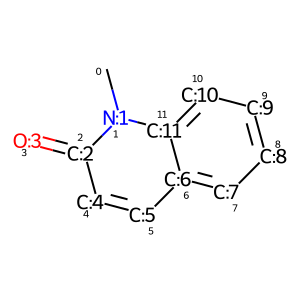

In [ ]:
IPythonConsole.drawOptions.addAtomIndices = True
size=IPythonConsole.molSize = 300,300
mol_1=Chem.MolFromSmiles(data.smiles.iloc[2])
mol_indexAtom=mol_with_atom_index(mol_1)
mol_indexAtom

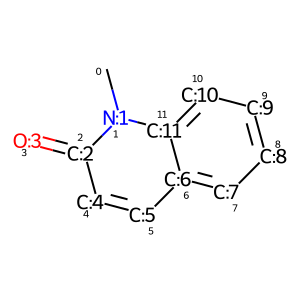

In [ ]:
IPythonConsole.molSize = 300,300

mol_indexAtom

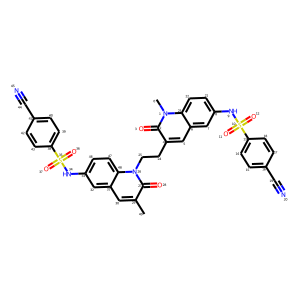

In [ ]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
for i in range(5):
  j=0
  for j in iter(data.smiles):
    j+=j
  mol=Chem.MolFromSmiles(j)
  mol
mol

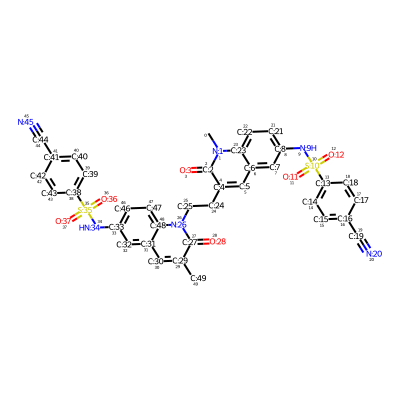

In [ ]:
IPythonConsole.molSize = 400,400
mol_with_atom_index(mol)

# transfotmations features Chemical dataset input.Shap[x]
1- now we'll converte data from Charachters to integers (cha2int) --> (int2Chat)

2- we'll transfrom data smlies to ONE-HOT-VECTRES (encoding )




In [ ]:
from sklearn.model_selection import train_test_split
smiles_train, smiles_test = train_test_split(data["smiles"], random_state=42)
print(smiles_train.shape)
print(smiles_test.shape)

(76,)
(26,)


In [ ]:
charset = set("".join(list(data.smiles))+"!E")
char_to_int = dict((c,i) for i,c in enumerate(charset))
int_to_char = dict((i,c) for i,c in enumerate(charset))
embed = max([len(smile) for smile in data.smiles]) + 5
print(str(charset))
print(len(charset), embed)

{'N', 'n', 'c', '4', 'C', '3', 'H', '#', '(', ')', 'F', 'S', 'O', '!', 'E', 's', '@', '5', '[', '1', 'r', '2', 'B', 'l', '=', '6', ']'}
27 82


C[C@H]1C[C@@H](Nc2ccc(Cl)cc2)c3cc(ccc3N1C(=O)C)c4ccc(cc4)C(=O)O


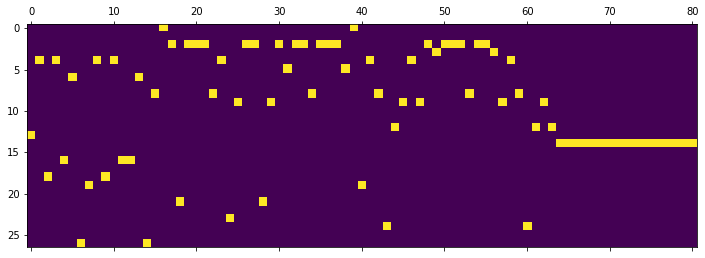

In [ ]:
def vectorize(smiles):
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        for i,smile in enumerate(smiles):
            #encode the startchar
            one_hot[i,0,char_to_int["!"]] = 1
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            #Encode endchar
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        #Return two, one for input and the other for output
        return one_hot[:,0:-1,:], one_hot[:,1:,:]
X_train, Y_train = vectorize(smiles_train.values)
X_test,Y_test = vectorize(smiles_test.values)
print(smiles_train.iloc[0])
plt.matshow(X_train[0].T)
#print X_train.shape

In [ ]:
"".join([int_to_char[idx] for idx in np.argmax(X_train[0,:,:], axis=1)])

In [ ]:
#Import Keras objects
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Concatenate
from keras import regularizers
input_shape = X_train.shape[1:]
output_dim = Y_train.shape[-1]
latent_dim = 64
lstm_dim = 64

In [ ]:
unroll = False
encoder_inputs = Input(shape=input_shape)
encoder = LSTM(lstm_dim, return_state=True,
                unroll=unroll)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
states = Concatenate(axis=-1)([state_h, state_c])
neck = Dense(latent_dim, activation="relu")
neck_outputs = neck(states)
decode_h = Dense(lstm_dim, activation="relu")
decode_c = Dense(lstm_dim, activation="relu")
state_h_decoded =  decode_h(neck_outputs)
state_c_decoded =  decode_c(neck_outputs)
encoder_states = [state_h_decoded, state_c_decoded]
decoder_inputs = Input(shape=input_shape)
decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll
                   )
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(output_dim, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
#Define the model, that inputs the training vector for two places, and predicts one character ahead of the input
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print(model.summary())



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 81, 27)]     0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   [(None, 64), (None,  23552       input_7[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 128)          0           lstm_6[0][1]                     
                                                                 lstm_6[0][2]                     
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 64)           8256        concatenate_3[0][0]        

In [ ]:
from keras.callbacks import History, ReduceLROnPlateau
h = History()
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.000001, verbose=1, epsilon=1e-5)

In [ ]:
from keras.optimizers import RMSprop, Adam
#opt=Adam(lr=0.005) #Default 0.001
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit([X_train,X_train],Y_train,
                    epochs=200,
                    batch_size=256,
                    shuffle=True,
                    callbacks=[h])

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 1.3055
Epoch 2/200
1/1 [==============================] - 0s 112ms/step - loss: 2.1621
Epoch 3/200
1/1 [==============================] - 0s 107ms/step - loss: 1.3872
Epoch 4/200
1/1 [==============================] - 0s 116ms/step - loss: 1.3868
Epoch 5/200
1/1 [==============================] - 0s 129ms/step - loss: 1.4746
Epoch 6/200
1/1 [==============================] - 0s 118ms/step - loss: 1.5110
Epoch 7/200
1/1 [==============================] - 0s 108ms/step - loss: 1.5227
Epoch 8/200
1/1 [==============================] - 0s 111ms/step - loss: 1.5194
Epoch 9/200
1/1 [==============================] - 0s 109ms/step - loss: 1.5059
Epoch 10/200
1/1 [==============================] - 0s 112ms/step - loss: 1.4852
Epoch 11/200
1/1 [==============================] - 0s 106ms/step - loss: 1.4596
Epoch 12/200
1/1 [==============================] - 0s 111ms/step - loss: 1.4322
Epoch 13/200
1/1 [======================

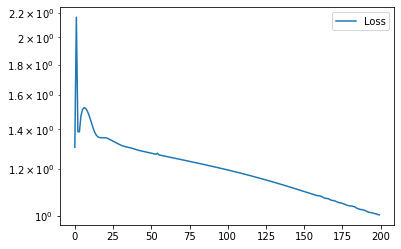

In [ ]:
plt.plot(h.history["loss"], label="Loss")
#plt.plot(h.history["val_loss"], label="Val_Loss")
plt.yscale("log")
plt.legend()

In [ ]:
for i in range(26):
    v = model.predict([X_test[i:i+1], X_test[i:i+1]]) #Can't be done as output not necessarely 1
    idxs = np.argmax(v, axis=2)
    pred=  "".join([int_to_char[h] for h in idxs[0]])[:-1]
    idxs2 = np.argmax(X_test[i:i+1], axis=2)
    true =  "".join([int_to_char[k] for k in idxs2[0]])[1:]
    if true != pred:
      print(true,pred)

CN1CC[C@@H](Nc2ncc(c3C=C(C)C(=O)Nc23)c4cncc(C)c4)[C@@H](C1)OCC5CCS(=O)(=O)CC5EEE COCCC(C(@@](CCcccccccccO)))))CO)ccccccccccccEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
CCN1C=C(c2cccc(c2)C(F)(F)F)c3sc(cc3C1=O)C(=N)NC4CCS(=O)(=O)CC4EEEEEEEEEEEEEEEEEE CO1(C(C(C(ccccccccc(=))=)))ccccccccc)CO)CCCOCCCCCCC(=O)C=O)CEEEEEEEEEEEEEEEEEEEE
CN1C=C(c2cccc(c2)C#N)c3sc(cc3C1=O)C(=N)NC4CCS(=O)(=O)CC4EEEEEEEEEEEEEEEEEEEEEEEE CO1CCC(C(ccccccccc()(C(ccccccc(CO)CCCCCCCCCCC(=O)C=O)C)EEEEEEEEEEEEEEEEEEEEEEEEE
COc1cc(ccc1S(=O)(=O)Nc2ccc3N(C)C(=O)C(=Cc3c2)C)C#NEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE COcccccccccc(CO))CO)cccccccc(C)C)CO)cccO)cccccCCCCEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
CC(C)CS(=O)(=O)N[C@H]1CCC(=O)N([C@@H]1c2ccc(Cl)cc2)c3ccc4C(=CC(=O)N(C)c4c3)CEEEE CO1CCC((=O)CCO)cccccccCCC(CO)CCCCCCH]cCccccccC)C((cCccccc((C))))O)))C)CccccEEEEE
CC(=O)c1cc(c2cc(ccc2C)C(=O)NC3CC3)c4ncccn14EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE CO1COcccccccccccccccc(C(=O))))cC(CCccccccccEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
CC(=O)c1cc(c2cccc(C)n2)c3cc(

In [ ]:
data_training ='/drive/My Drive/smiles'
smifile = data_training + '/Results.txt'
data = pd.read_csv(smifile, delimiter = "\t", index_col=False)
data.head()

,Real_Smlies predicted_Smlies
0,CN1CC[C@@H](Nc2ncc(c3C=C(C)C(=O)Nc23)c4cncc(C)...
1,CCN1C=C(c2cccc(c2)C(F)(F)F)c3sc(cc3C1=O)C(=N)N...
2,CN1C=C(c2cccc(c2)C#N)c3sc(cc3C1=O)C(=N)NC4CCS(...
3,COc1cc(ccc1S(=O)(=O)Nc2ccc3N(C)C(=O)C(=Cc3c2)C...
4,CC(C)CS(=O)(=O)N[C@H]1CCC(=O)N([C@@H]1c2ccc(Cl...
